#### Import Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("diabetes_dataset.csv")

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.shape

(768, 9)

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Check Percentage of Missing Values

In [6]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X=dataset.drop("Outcome",axis=1)
Y=dataset.Outcome
X.shape,Y.shape

((768, 8), (768,))

#### Feature Selection

1. Filter Method
   - ANOVA Test
   -  Chi-Square Test
   - Correlation Coefficient
   

2. Wrapper Method
    - Forward Selection
    - Backward Elimination
    - Recursive Feature Elimination

3. Embedded Method

Selection Techniques: Univariate Selection, Feature Importances & Correlation Matrix

#### Univariate Selection
1. Using Chi-Square

In [8]:
from sklearn.feature_selection import SelectKBest,chi2
best_features=SelectKBest(score_func=chi2,k=5) # k=5, means selecting top 5 features
fit=best_features.fit(X,Y)

In [9]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

In [10]:
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Specs","Score"]

In [11]:
feature_scores

,Specs,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [12]:
print(f'{feature_scores.nlargest(5,"Score")}')

         Specs        Score
4      Insulin  2175.565273
1      Glucose  1411.887041
7          Age   181.303689
5          BMI   127.669343
0  Pregnancies   111.519691


In [13]:
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(score_func=f_classif,k=5) # k=5, means selecting top 5 features
fit=best_features.fit(X,Y)

In [14]:
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)

In [15]:
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Specs","Score"]

In [16]:
feature_scores

,Specs,Score
0,Pregnancies,39.670227
1,Glucose,213.161752
2,BloodPressure,3.256950
3,SkinThickness,4.304381
4,Insulin,13.281108
5,BMI,71.772072
6,DiabetesPedigreeFunction,23.871300
7,Age,46.140611


In [17]:
print(f'{feature_scores.nlargest(5,"Score")}')

                      Specs       Score
1                   Glucose  213.161752
5                       BMI   71.772072
7                       Age   46.140611
0               Pregnancies   39.670227
6  DiabetesPedigreeFunction   23.871300


#### Feature Importances

In [18]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier()

In [19]:
model.feature_importances_

array([0.10909788, 0.23080205, 0.09964543, 0.08155249, 0.07402547,
       0.14093911, 0.11797152, 0.14596605])

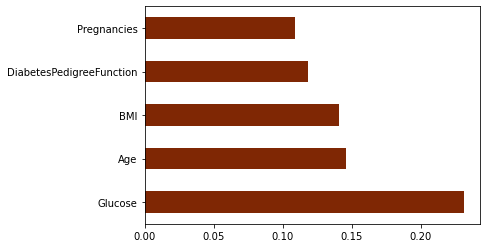

In [20]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind="barh",cmap="Oranges_r")
plt.show()

#### Correlation Matrix using Heatmap

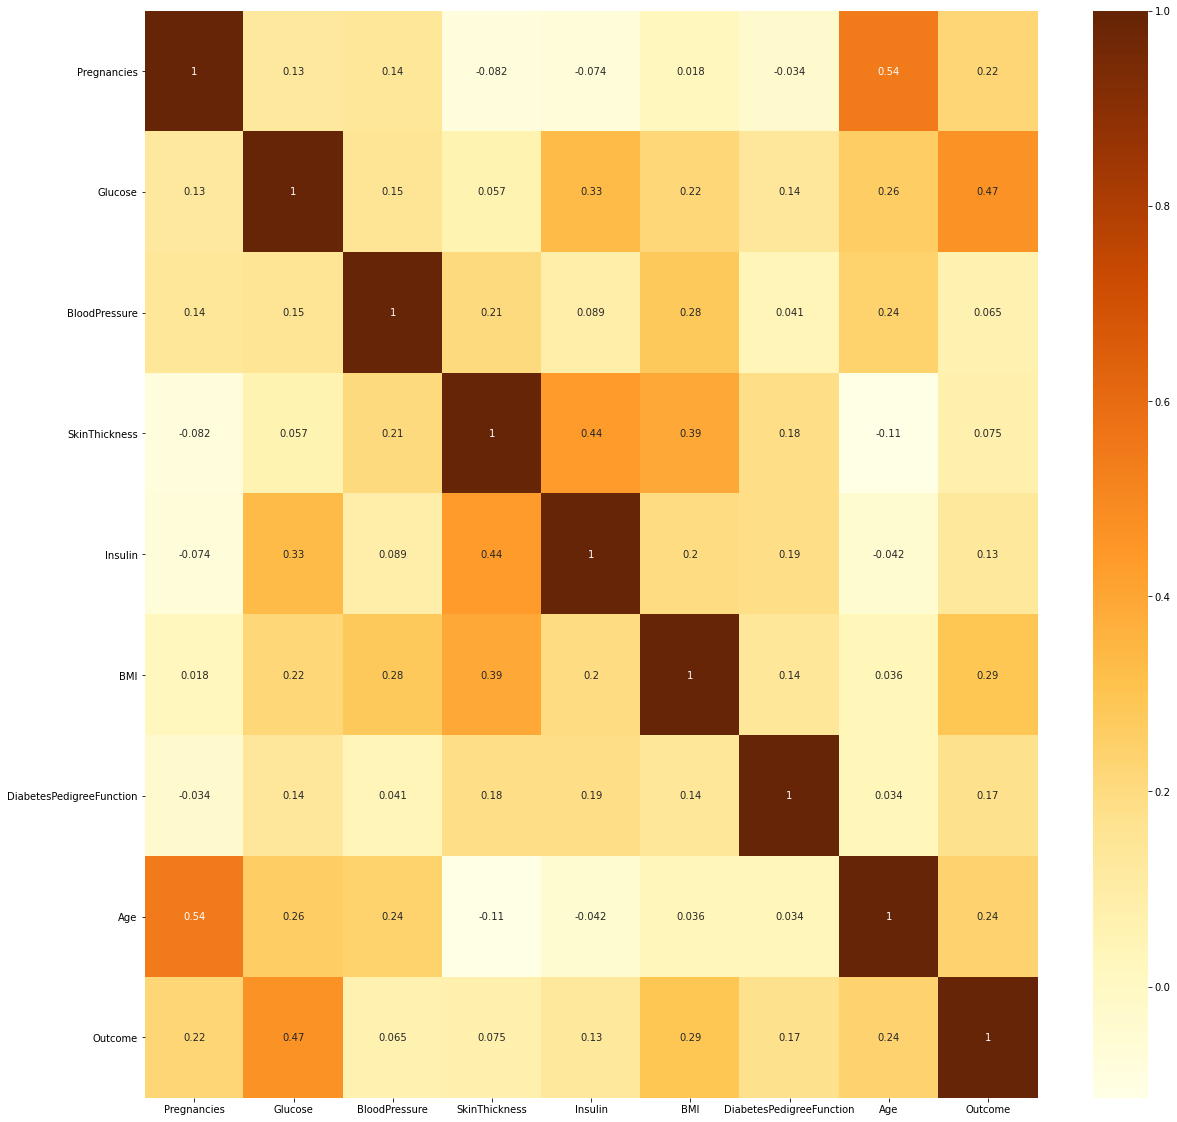

In [21]:
corrmat=dataset.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="YlOrBr")

#### Using RFE

In [22]:
# Using RFE with Logistic Regression classifier to select top 4 Features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [23]:
model=LogisticRegression()
rfe=RFE(model,4)
fit=rfe.fit(X,Y)
print(f'Number of Features: {fit.n_features_}')
print(f'Selected Features : {fit.support_}')
print(f'feature Ranking: {fit.ranking_}')

Number of Features: 4
Selected Features : [ True  True False False False  True  True False]
feature Ranking: [1 1 3 4 5 1 1 2]


C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
df_rank=pd.DataFrame(fit.ranking_)
df_columns=pd.DataFrame(X.columns)

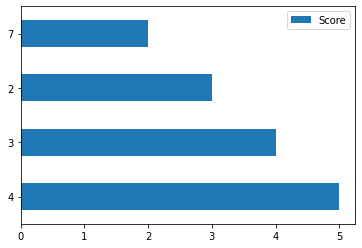

In [25]:
feature_ranks=pd.concat([df_columns,df_rank],axis=1)
feature_ranks.columns=["Specs","Score"]
feature_ranks.nlargest(4,"Score").plot(kind="barh")

In [26]:
feature_ranks

,Specs,Score
0,Pregnancies,1
1,Glucose,1
2,BloodPressure,3
3,SkinThickness,4
4,Insulin,5
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,2


In [27]:
#### Using PCA

In [28]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=4)
#fit=pca.fit(X)

In [29]:
#print(f'Explained Variance: {fit.explained_variance_ratio_}')
#print(fit.components_)

#### Selecting Features based on Embedded method

In [30]:
feat_importances.nlargest(5)

Glucose                     0.230802
Age                         0.145966
BMI                         0.140939
DiabetesPedigreeFunction    0.117972
Pregnancies                 0.109098
dtype: float64

In [31]:
X.columns,X.shape

(Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age'],
       dtype='object'),
 (768, 8))

In [32]:
X=X.drop(['SkinThickness','Insulin','BloodPressure'],axis=1)

In [33]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import *
# Construct Pipelines
from sklearn.pipeline import Pipeline
# Construct some Pipelines
pipe_lr=Pipeline([ ('scl', StandardScaler()),
    ('clf',LogisticRegression(random_state=42))
])
pipe_lr_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=4)),
            ('clf', LogisticRegression(random_state=42))])
pipe_rf = Pipeline([('scl', StandardScaler()),
     ('clf', RandomForestClassifier(random_state=42))
      ])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
        ('pca', PCA(n_components=4)),
        ('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
        ('clf', SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=4)),
            ('clf', SVC(random_state=42))])

In [35]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]
grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
            'clf__C': param_range_fl,
            'clf__solver': ['liblinear']}] 
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__min_samples_leaf': param_range,
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]
grid_params_svm = [{'clf__kernel': ['linear', 'rbf'],'clf__C': param_range}]

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
gs_lr = GridSearchCV(estimator=pipe_lr,param_grid=grid_params_lr,scoring='accuracy',cv=10) 
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,param_grid=grid_params_lr,scoring='accuracy',cv=10)
gs_rf = GridSearchCV(estimator=pipe_rf,param_grid=grid_params_rf,scoring='accuracy',cv=10,n_jobs=-1)
gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,param_grid=grid_params_rf,scoring='accuracy',cv=10,n_jobs=-1)
gs_svm = GridSearchCV(estimator=pipe_svm,param_grid=grid_params_svm,scoring='accuracy',cv=10,n_jobs=-1)
gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,param_grid=grid_params_svm,scoring='accuracy',cv=10,n_jobs=-1)

In [38]:
# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
            2: 'Random Forest', 3: 'Random Forest w/PCA', 
            4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

In [39]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx,gs in enumerate(grids):
    print('\nEstimator: %s'%grid_dict[idx])
    # Fit Grid Search
    gs.fit(x_train,y_train)
    # Best Parameters
    print(f'Best Parameters: {gs.best_params_}')
    # Best Training Data Accuracy
    print(f'Best Training Accuracy: {gs.best_score_}')
    # Predict on test data with best parameters
    y_pred=gs.predict(x_test)
    # Test data accuracy of model with best params
    print(f'Test Set Accuracy score for best parameters: {accuracy_score(y_test,y_pred)}')
    # Track best (highest test accuracy) Model
    if accuracy_score(y_test,y_pred)>best_acc:
        best_acc=accuracy_score(y_test,y_pred)
        best_gs=gs
        best_clf=idx
print(f'\n Classifier with best test set Accuracy: {grid_dict[best_clf]}')

Performing model optimizations...

Estimator: Logistic Regression
Best Parameters: {'clf__C': 0.5, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best Training Accuracy: 0.7687202538339503
Test Set Accuracy score for best parameters: 0.7727272727272727

Estimator: Logistic Regression w/PCA


C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\sklearn\pipeline.py", line 330, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\sklearn\pipeline.py", line 292, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\Krishna\anaconda3\envs\gputensor\lib\site-packages\sklearn\pipelin

Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best Training Accuracy: 0.7572184029613961
Test Set Accuracy score for best parameters: 0.7662337662337663

Estimator: Random Forest
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 9, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 4}
Best Training Accuracy: 0.7719460602855632
Test Set Accuracy score for best parameters: 0.7922077922077922

Estimator: Random Forest w/PCA
Best Parameters: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 9}
Best Training Accuracy: 0.7556583818085668
Test Set Accuracy score for best parameters: 0.7792207792207793

Estimator: Support Vector Machine
Best Parameters: {'clf__C': 1, 'clf__kernel': 'linear'}
Best Training Accuracy: 0.7686938127974616
Test Set Accuracy score for best parameters: 0.7792207792207793

Estimator: Support Vector Machine w/PCA
Best Parameters: {'clf__C': 4, 'clf__kernel': 'linea

In [40]:
print(f'\n Classifier with best test set Accuracy: {grid_dict[best_clf]}')


 Classifier with best test set Accuracy: Random Forest


In [41]:
import pickle

In [51]:
dump_file="Best_model_Random_Forest.pkl"
model=RandomForestClassifier(criterion="entropy",max_depth=9,min_samples_leaf=1,min_samples_split=4).fit(X,Y)
pickle.dump(model,open(dump_file, 'wb'))
